In [1]:
#!pip install librosa

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display

In [2]:
import IPython.display as ipd

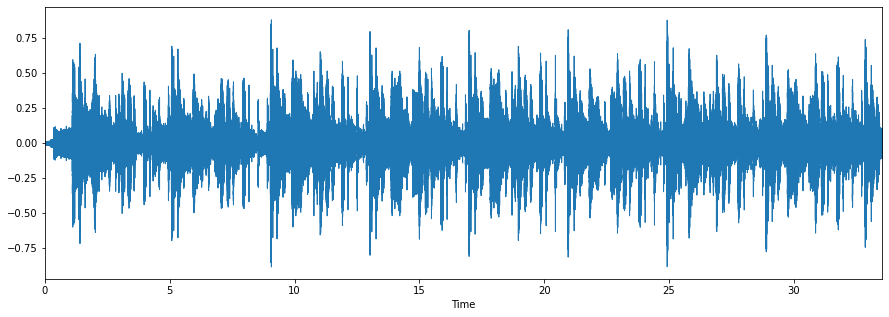

In [3]:
df = 'example.wav'

plt.figure(figsize=(15,5))
data,sample_rate=librosa.load(df)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(df) #Audio lets you directly play audio in a Jupyter Notebook

Librosa converts the signal to Mono, i.e. 1 channel 

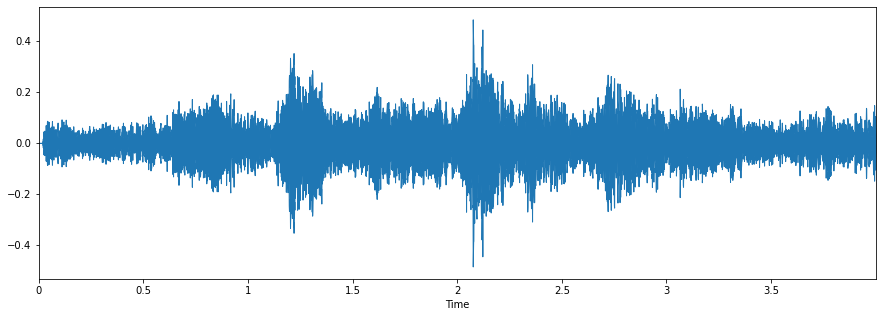

In [4]:
df = '/home/mona/python_notebooks/audio_classification/archive/fold9/7975-3-0-0.wav'

plt.figure(figsize=(15,5))
data,sample_rate=librosa.load(df)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(df)

In [6]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.03520184,
       -0.03752632, -0.03967171], dtype=float32)

In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(df)

In [9]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-1379, -1087],
       [-1689,  -758],
       [-1947,  -593]], dtype=int16)

In [10]:
wave_sample_rate

44100

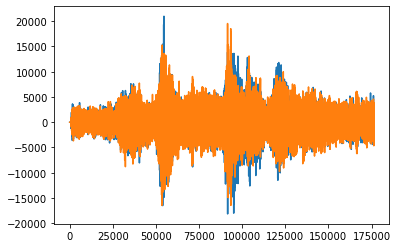

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
#We can see the audio below has two channels

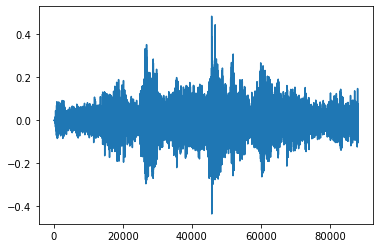

In [12]:
plt.plot(data)

<ipython-input-96-661666d7a6d7>:4: UserWarning: Only one segment is calculated since parameter NFFT (=22050) >= signal length (=40).
  plt.specgram(data,sample_rate)


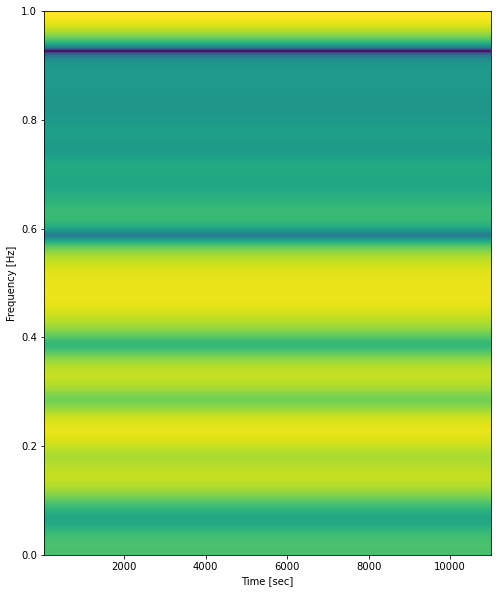

In [96]:
from scipy import signal
from scipy.fft import fftshift
plt.figure(figsize=(8,10))
plt.specgram(data,sample_rate)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [14]:
df_file=pd.read_csv('/home/mona/python_notebooks/audio_classification/archive/UrbanSound8K.csv')
df_file.sample(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
892,118278-4-0-7.wav,118278,3.500000,7.500000,2,10,4,drilling
1507,13579-2-0-17.wav,13579,10.119075,14.119075,1,9,2,children_playing
3994,178260-7-1-3.wav,178260,6.837693,10.837693,1,5,7,jackhammer
3530,172338-9-0-20.wav,172338,98.260480,102.260480,1,4,9,street_music
8373,89724-5-0-4.wav,89724,7.221276,11.221276,1,5,5,engine_idling
1593,139665-9-0-23.wav,139665,11.500000,15.500000,2,5,9,street_music
989,121286-0-0-7.wav,121286,3.500000,7.500000,1,5,0,air_conditioner
182,103074-7-3-0.wav,103074,46.632637,50.632637,1,1,7,jackhammer
2101,151005-4-1-0.wav,151005,11.445447,15.445447,1,4,4,drilling
1119,125678-7-3-2.wav,125678,73.177418,77.177418,1,8,7,jackhammer


In [15]:
df_file['class'].value_counts()

street_music        1000
engine_idling       1000
dog_bark            1000
air_conditioner     1000
children_playing    1000
drilling            1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

**Extract Features**

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [18]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [19]:
mfccs

array([[-3.88779449e+02, -2.81908966e+02, -2.47847748e+02, ...,
        -2.79007233e+02, -2.72263397e+02, -2.69221588e+02],
       [ 1.18356995e+02,  1.25707207e+02,  1.24073105e+02, ...,
         1.43331253e+02,  1.52851288e+02,  1.55764679e+02],
       [-1.98922768e+01, -2.44137840e+01, -2.82887840e+01, ...,
        -2.28708668e+01, -1.77572079e+01, -1.00322514e+01],
       ...,
       [ 3.44810128e-01,  3.00652981e+00,  1.79240298e+00, ...,
         8.16412830e+00,  6.98183823e+00,  8.10548592e+00],
       [ 2.55855179e+00,  2.97923231e+00,  2.14895153e+00, ...,
         5.93693197e-01,  2.13056684e-01, -1.68290210e+00],
       [-7.81628466e+00, -7.21209526e+00, -7.98581982e+00, ...,
         2.18583322e+00, -1.02356160e+00,  3.91563582e+00]], dtype=float32)

In [24]:
#### Extracting MFCC's For every audio file

audio_data_path='/home/mona/python_notebooks/audio_classification/archive/'

In [25]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [26]:
import numpy as np
import os
from tqdm import tqdm #allows you to output a smart progress bar by wrapping around any iterable
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df_file.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_data_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [06:17,  9.58it/s]/home/mona/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8326it [15:49, 15.59it/s]/home/mona/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
/home/mona/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [16:30,  8.82it/s]


In [27]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [29]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [30]:
X.shape

(8732, 40)

In [31]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [32]:
y.shape

(8732, 10)

In [33]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844023e+00, -5.2119040e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537474e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233374e+00, ...,
         8.6335999e-01,  6.4766788e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321609e+00]], dtype=float32)

In [35]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
X_train.shape

(6985, 40)

In [37]:
X_test.shape

(1747, 40)

In [38]:
y_train.shape

(6985, 10)

In [39]:
y_test.shape

(1747, 10)

**Model Creation with Tensor Flow**

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [41]:
### No of classes
num_labels=y.shape[1]

In [43]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [45]:

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [47]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/home/mona/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 0s 1ms/step - loss: 2.5058 - accuracy: 0.1288 - val_loss: 2.2805 - val_accuracy: 0.1082

Epoch 00001: val_loss improved from inf to 2.28051, saving model to /home/mona/audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 2.3316 - accuracy: 0.1369 - val_loss: 2.2139 - val_accuracy: 0.1998

Epoch 00002: val_loss improved from 2.28051 to 2.21387, saving model to /home/mona/audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 2.2664 - accuracy: 0.1443 - val_loss: 2.1626 - val_accuracy: 0.2261

Epoch 00003: val_loss improved from 2.21387 to 2.16259, saving model to /home/mona/audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 2.1983 - accuracy: 0.1685 - val_loss: 2.1115 - val_accuracy: 0.2410

Epoch 00004: val_loss improved from 2.16259 to 2.11154, saving model to /home/mona/audio_classificati


Epoch 00068: val_loss improved from 0.84052 to 0.82220, saving model to /home/mona/audio_classification.hdf5
Epoch 69/100
219/219 [==============================] - 0s 1ms/step - loss: 1.0490 - accuracy: 0.6368 - val_loss: 0.8240 - val_accuracy: 0.7355

Epoch 00069: val_loss did not improve from 0.82220
Epoch 70/100
219/219 [==============================] - 0s 1ms/step - loss: 1.0513 - accuracy: 0.6397 - val_loss: 0.8212 - val_accuracy: 0.7270

Epoch 00070: val_loss improved from 0.82220 to 0.82118, saving model to /home/mona/audio_classification.hdf5
Epoch 71/100
219/219 [==============================] - 0s 1ms/step - loss: 1.0403 - accuracy: 0.6428 - val_loss: 0.8335 - val_accuracy: 0.7287

Epoch 00071: val_loss did not improve from 0.82118
Epoch 72/100
219/219 [==============================] - 0s 1ms/step - loss: 1.0279 - accuracy: 0.6451 - val_loss: 0.8081 - val_accuracy: 0.7333

Epoch 00072: val_loss improved from 0.82118 to 0.80815, saving model to /home/mona/audio_classifica

In [48]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7378363013267517


In [51]:
X_test[1].shape

(40,)

In [63]:
res_predicted=np.argmax(model.predict(X_test),axis=1)

In [71]:
res_predicted[0:11]

array([5, 3, 4, 0, 4, 2, 0, 4, 9, 8, 9])

In [70]:
for i in range(11):
    print(np.argmax(y_test[i]))

5
1
4
9
9
2
1
4
9
8
2


In [82]:
res_actual=[]
for i in range(len(y_test)):
    res_actual.append(np.argmax(y_test[i]))

In [86]:
res_actual=np.array(res_actual)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(res_actual,res_predicted)) 

[[167   0  21   2   1   0   0   2   0   2]
 [  2  68   1   1   3   1   0   3   0  12]
 [ 30   0 146   7   2   2   3   2   2  11]
 [  8   0  36 125   1   0   0   0   5   7]
 [  3   0   8   4 155   0   0  19   0  13]
 [ 35   1  18   0   0 149   0   1   4   8]
 [  4   0  15  13   2   0  51   1   0   1]
 [ 15   0   2   0   3   0   0 166   0   1]
 [  2   0  16   4   0   0   0   0 175   2]
 [ 33   0  33   7  12   1   0   6   4  87]]


Text(69.0, 0.5, 'Truth')

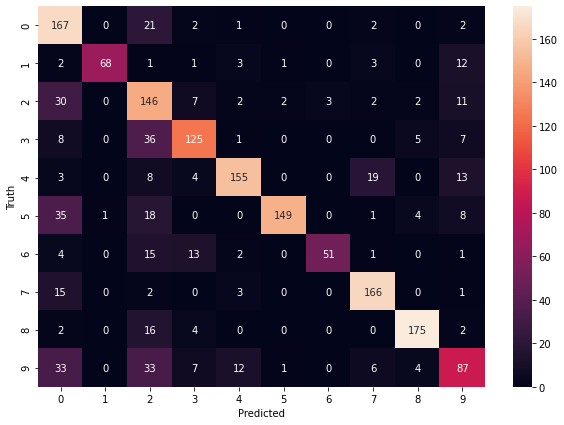

In [88]:
import seaborn as sn
cm = confusion_matrix(res_actual,res_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
filename="dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)